In [9]:
library(tidyverse)
library(magrittr)
library(scales)


dp_plot = function(data, eval) {
    data %>%
        dplyr::filter(Eval == eval) %>%
        ggplot2::ggplot(aes(x = d_param, y = FE_pct, group = N)) + 
        ggplot2::geom_line(aes(color = dim), alpha = 0.5) + facet_wrap( ~ p_target) +
        ggplot2::geom_point(aes(color = dim)) + 
        scale_x_log10(breaks = trans_breaks("log10", function(x) 10^x),
        labels = trans_format("log10", math_format(10^.x))) +
        ylim(0, 1.2) + 
        ggplot2::theme(
        axis.title = ggplot2::element_text(size = 15, face = "bold"),
        axis.text = ggplot2::element_text(size = 15, face = "bold"),
        legend.text = ggplot2::element_text(size = 15, face = "bold"),
        strip.text = ggplot2::element_text(size = 15, face = "bold"),
        legend.title = ggplot2::element_text(size = 15, face = "bold")
    )   + theme_bw()
}
options(repr.plot.width=20, repr.plot.height=20)

In [3]:
df = readr::read_csv("../param-exps/data/new-crit//pt-dp-complex-ppmf-experiments.csv")


── Column specification ────────────────────────────────────────────────────────
cols(
  FE = col_double(),
  N = col_double(),
  Eval = col_character(),
  p_target = col_double(),
  d_param = col_double(),
  Iteration = col_double(),
  Alg = col_character()
)




In [4]:
df_ave = 
    df %>% 
    dplyr::filter(p_target != 0.9) %>%
    dplyr::group_by(
          N,
          Eval,
          Alg,
          p_target,
          d_param) %>%
        dplyr::summarize(FE_ave = mean(FE)) %>%
        dplyr::mutate(FE_pct = FE_ave / (10000 * N)) %>%
        dplyr::mutate(dim = factor(N, levels = c(1:100))) %>%
        dplyr::ungroup()
    

`summarise()` regrouping output by 'N', 'Eval', 'Alg', 'p_target' (override with `.groups` argument)



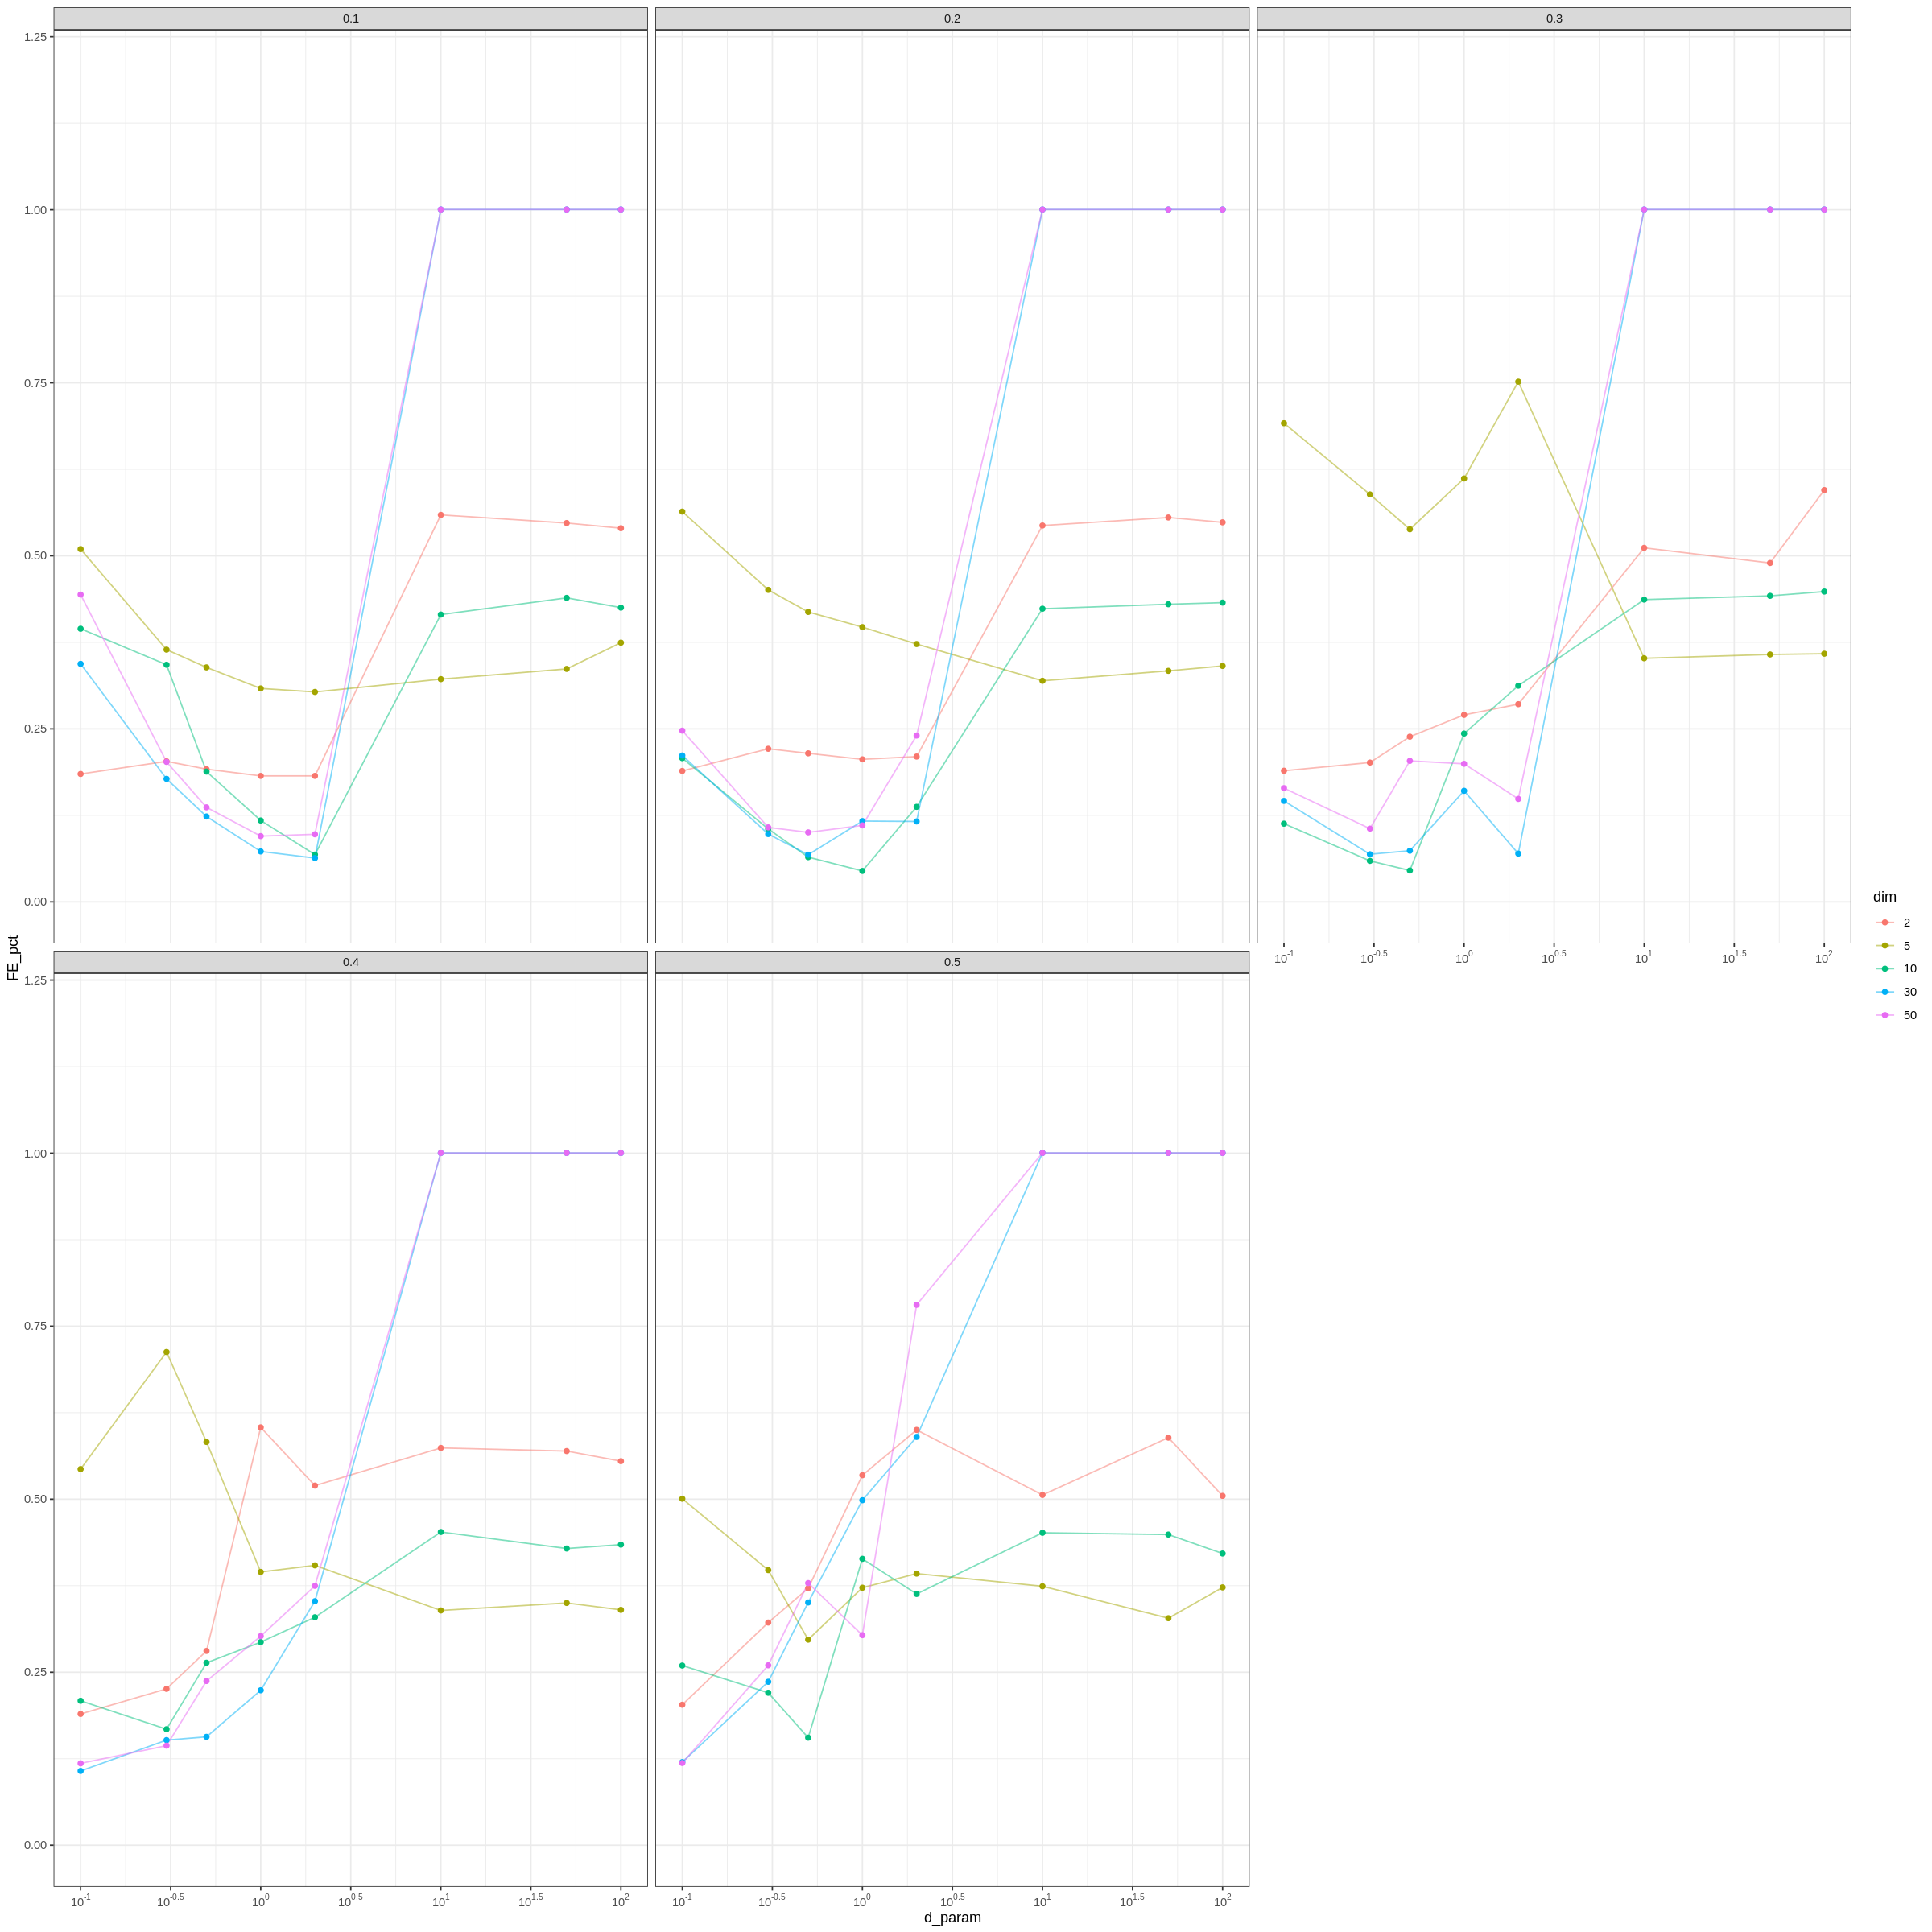

In [10]:
df_ave %>% dp_plot("Griewank")

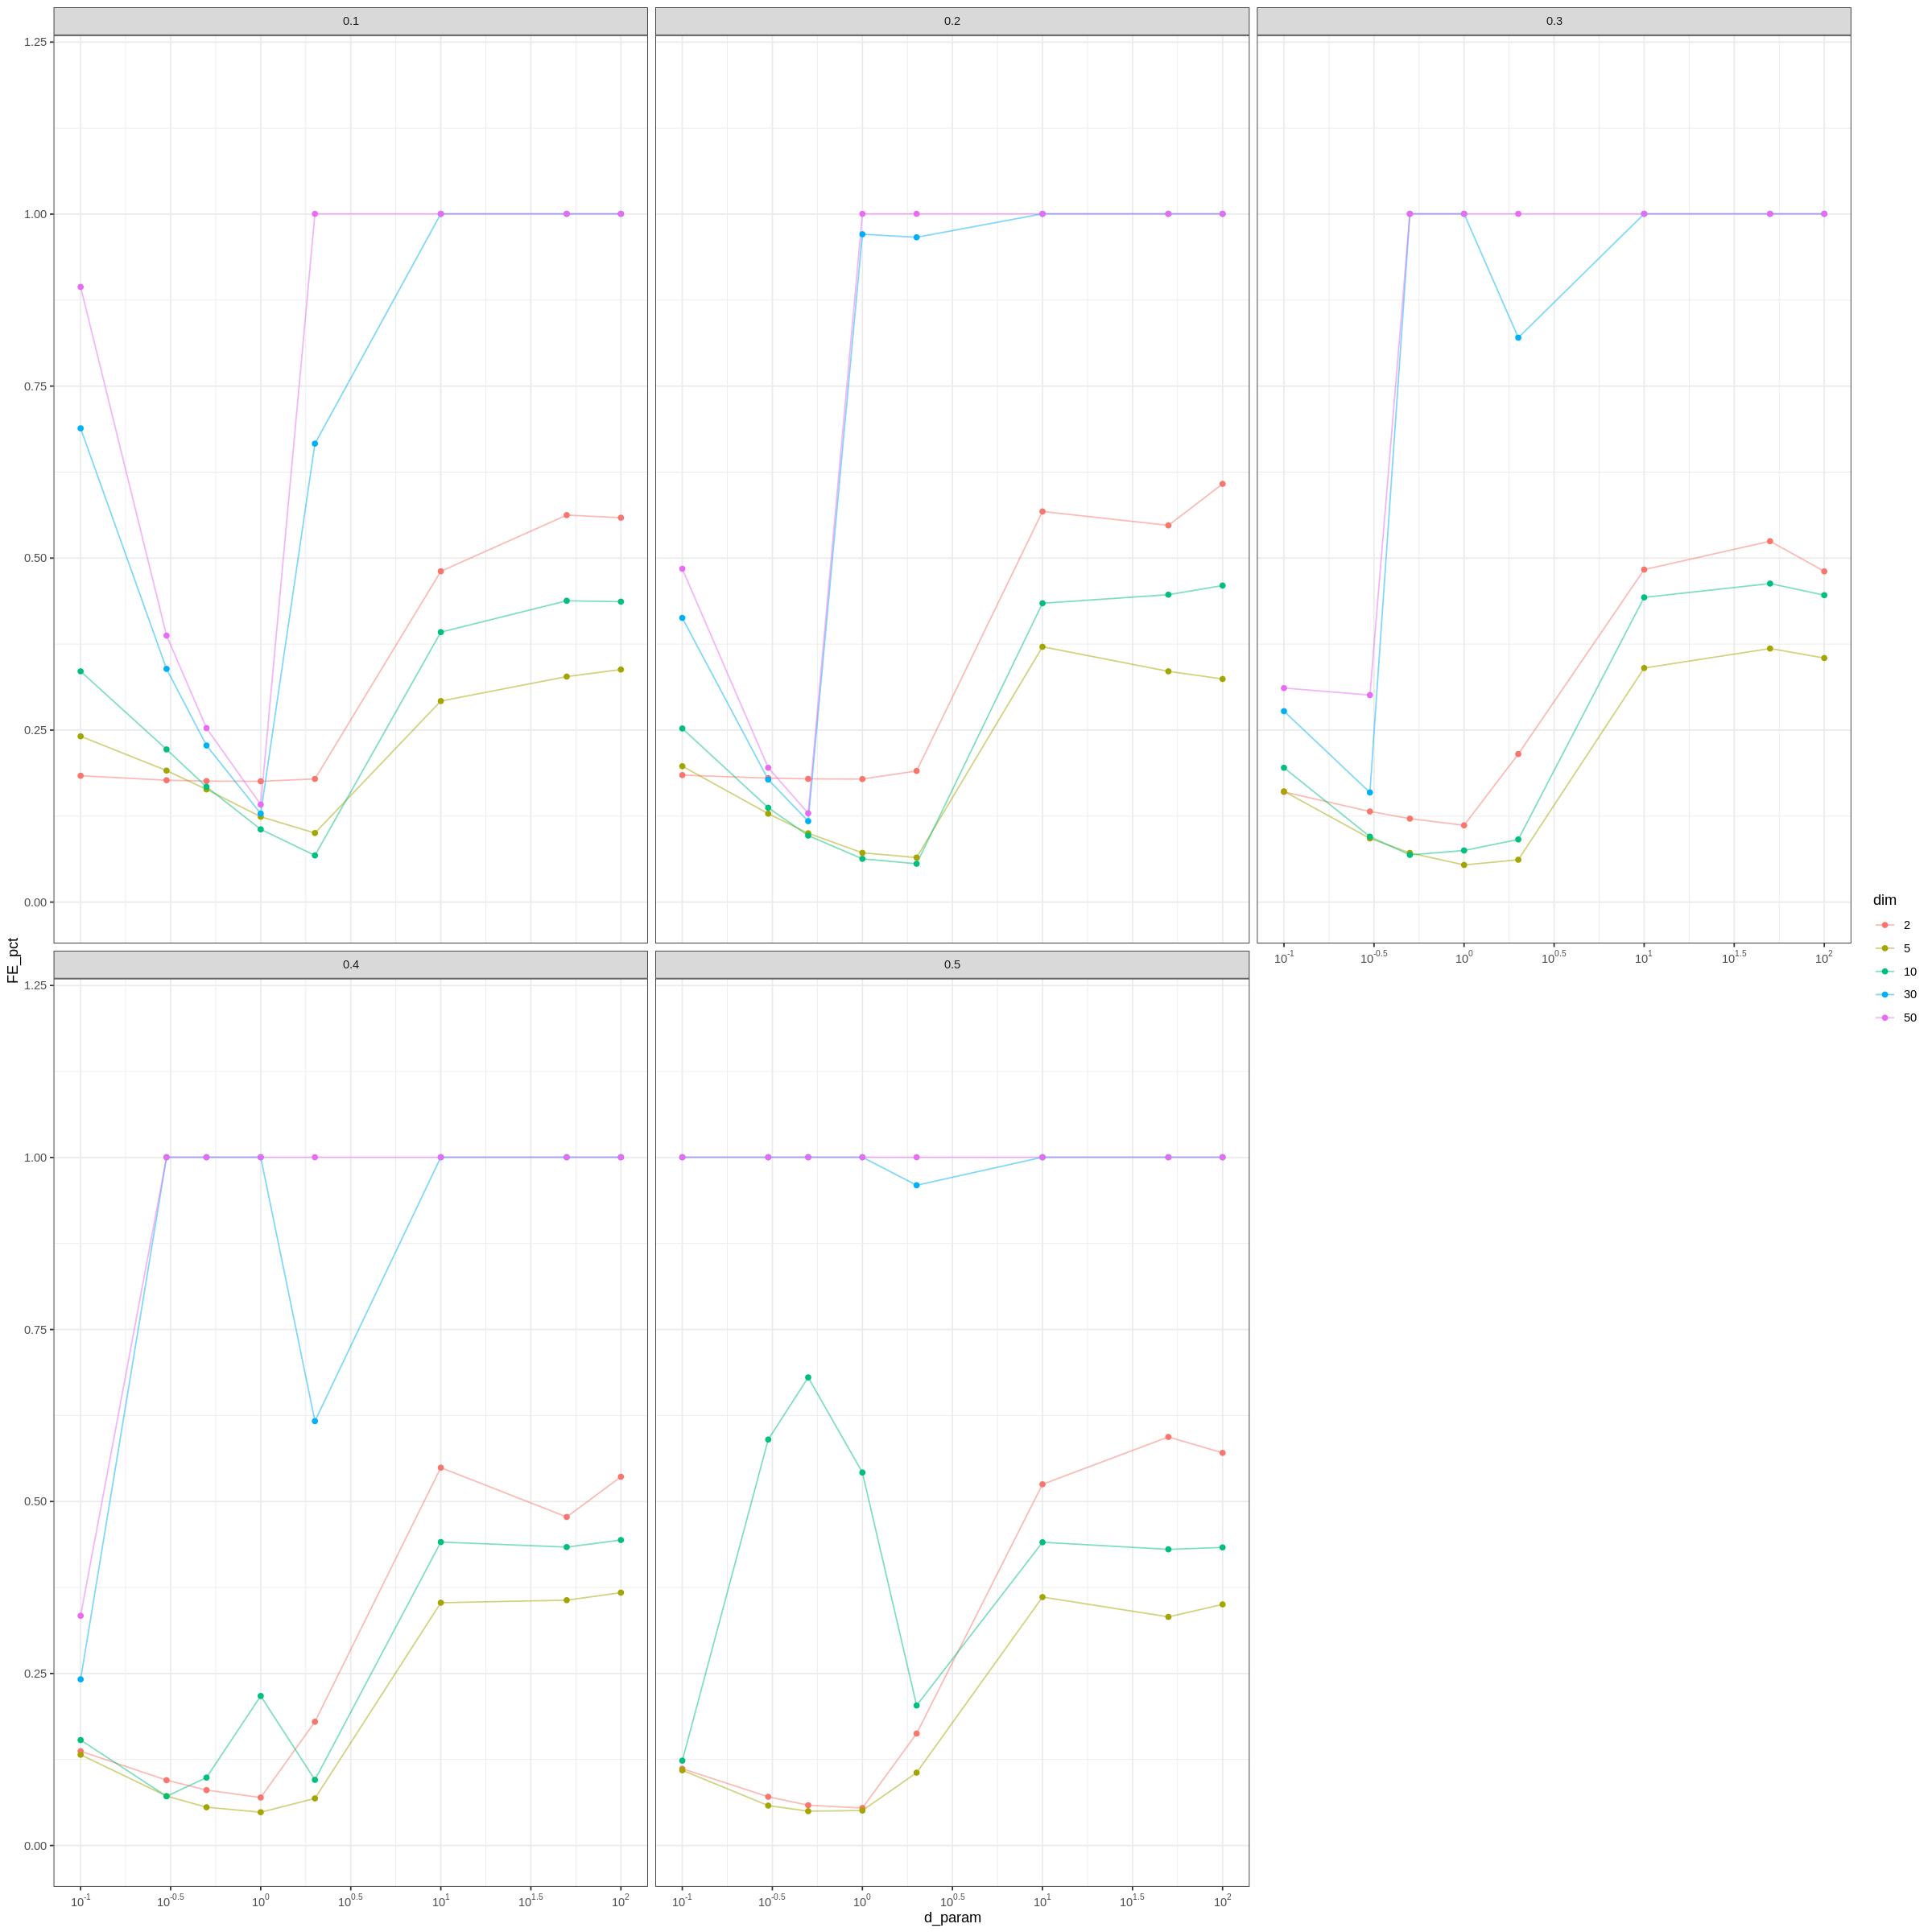

In [11]:
df_ave %>% dp_plot("Schwefel")

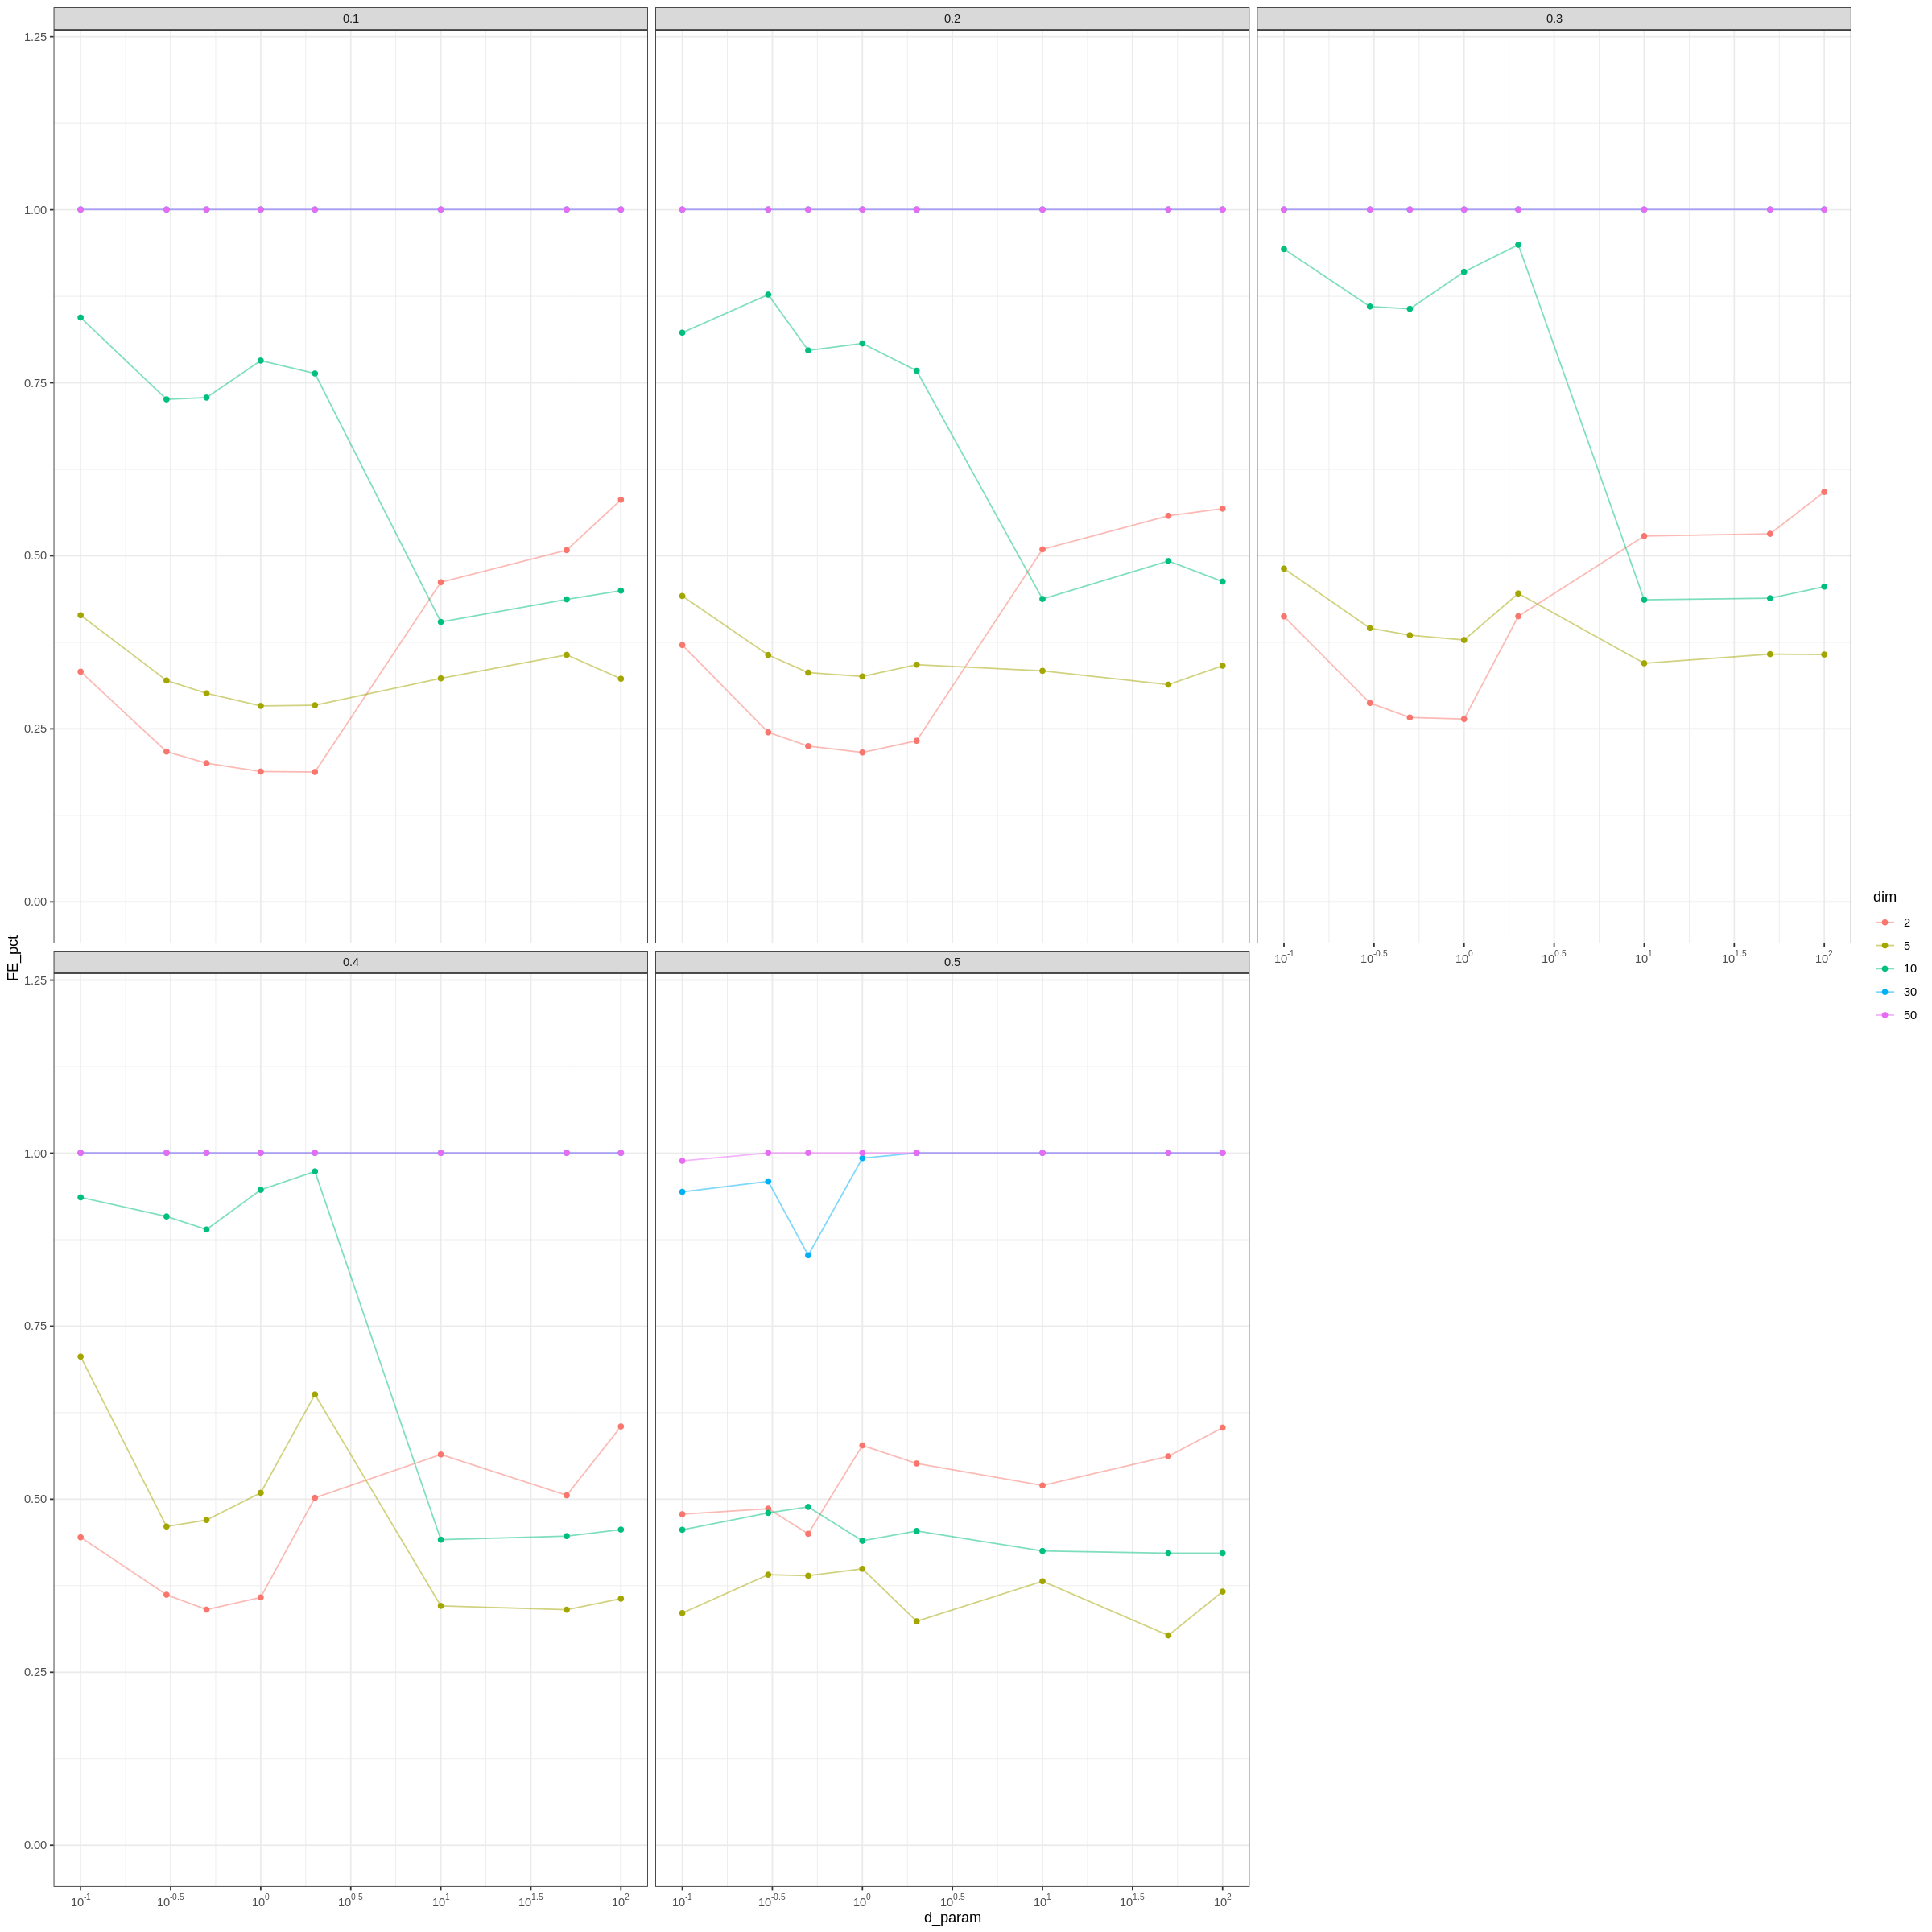

In [12]:
df_ave %>% dp_plot("Schaffer")

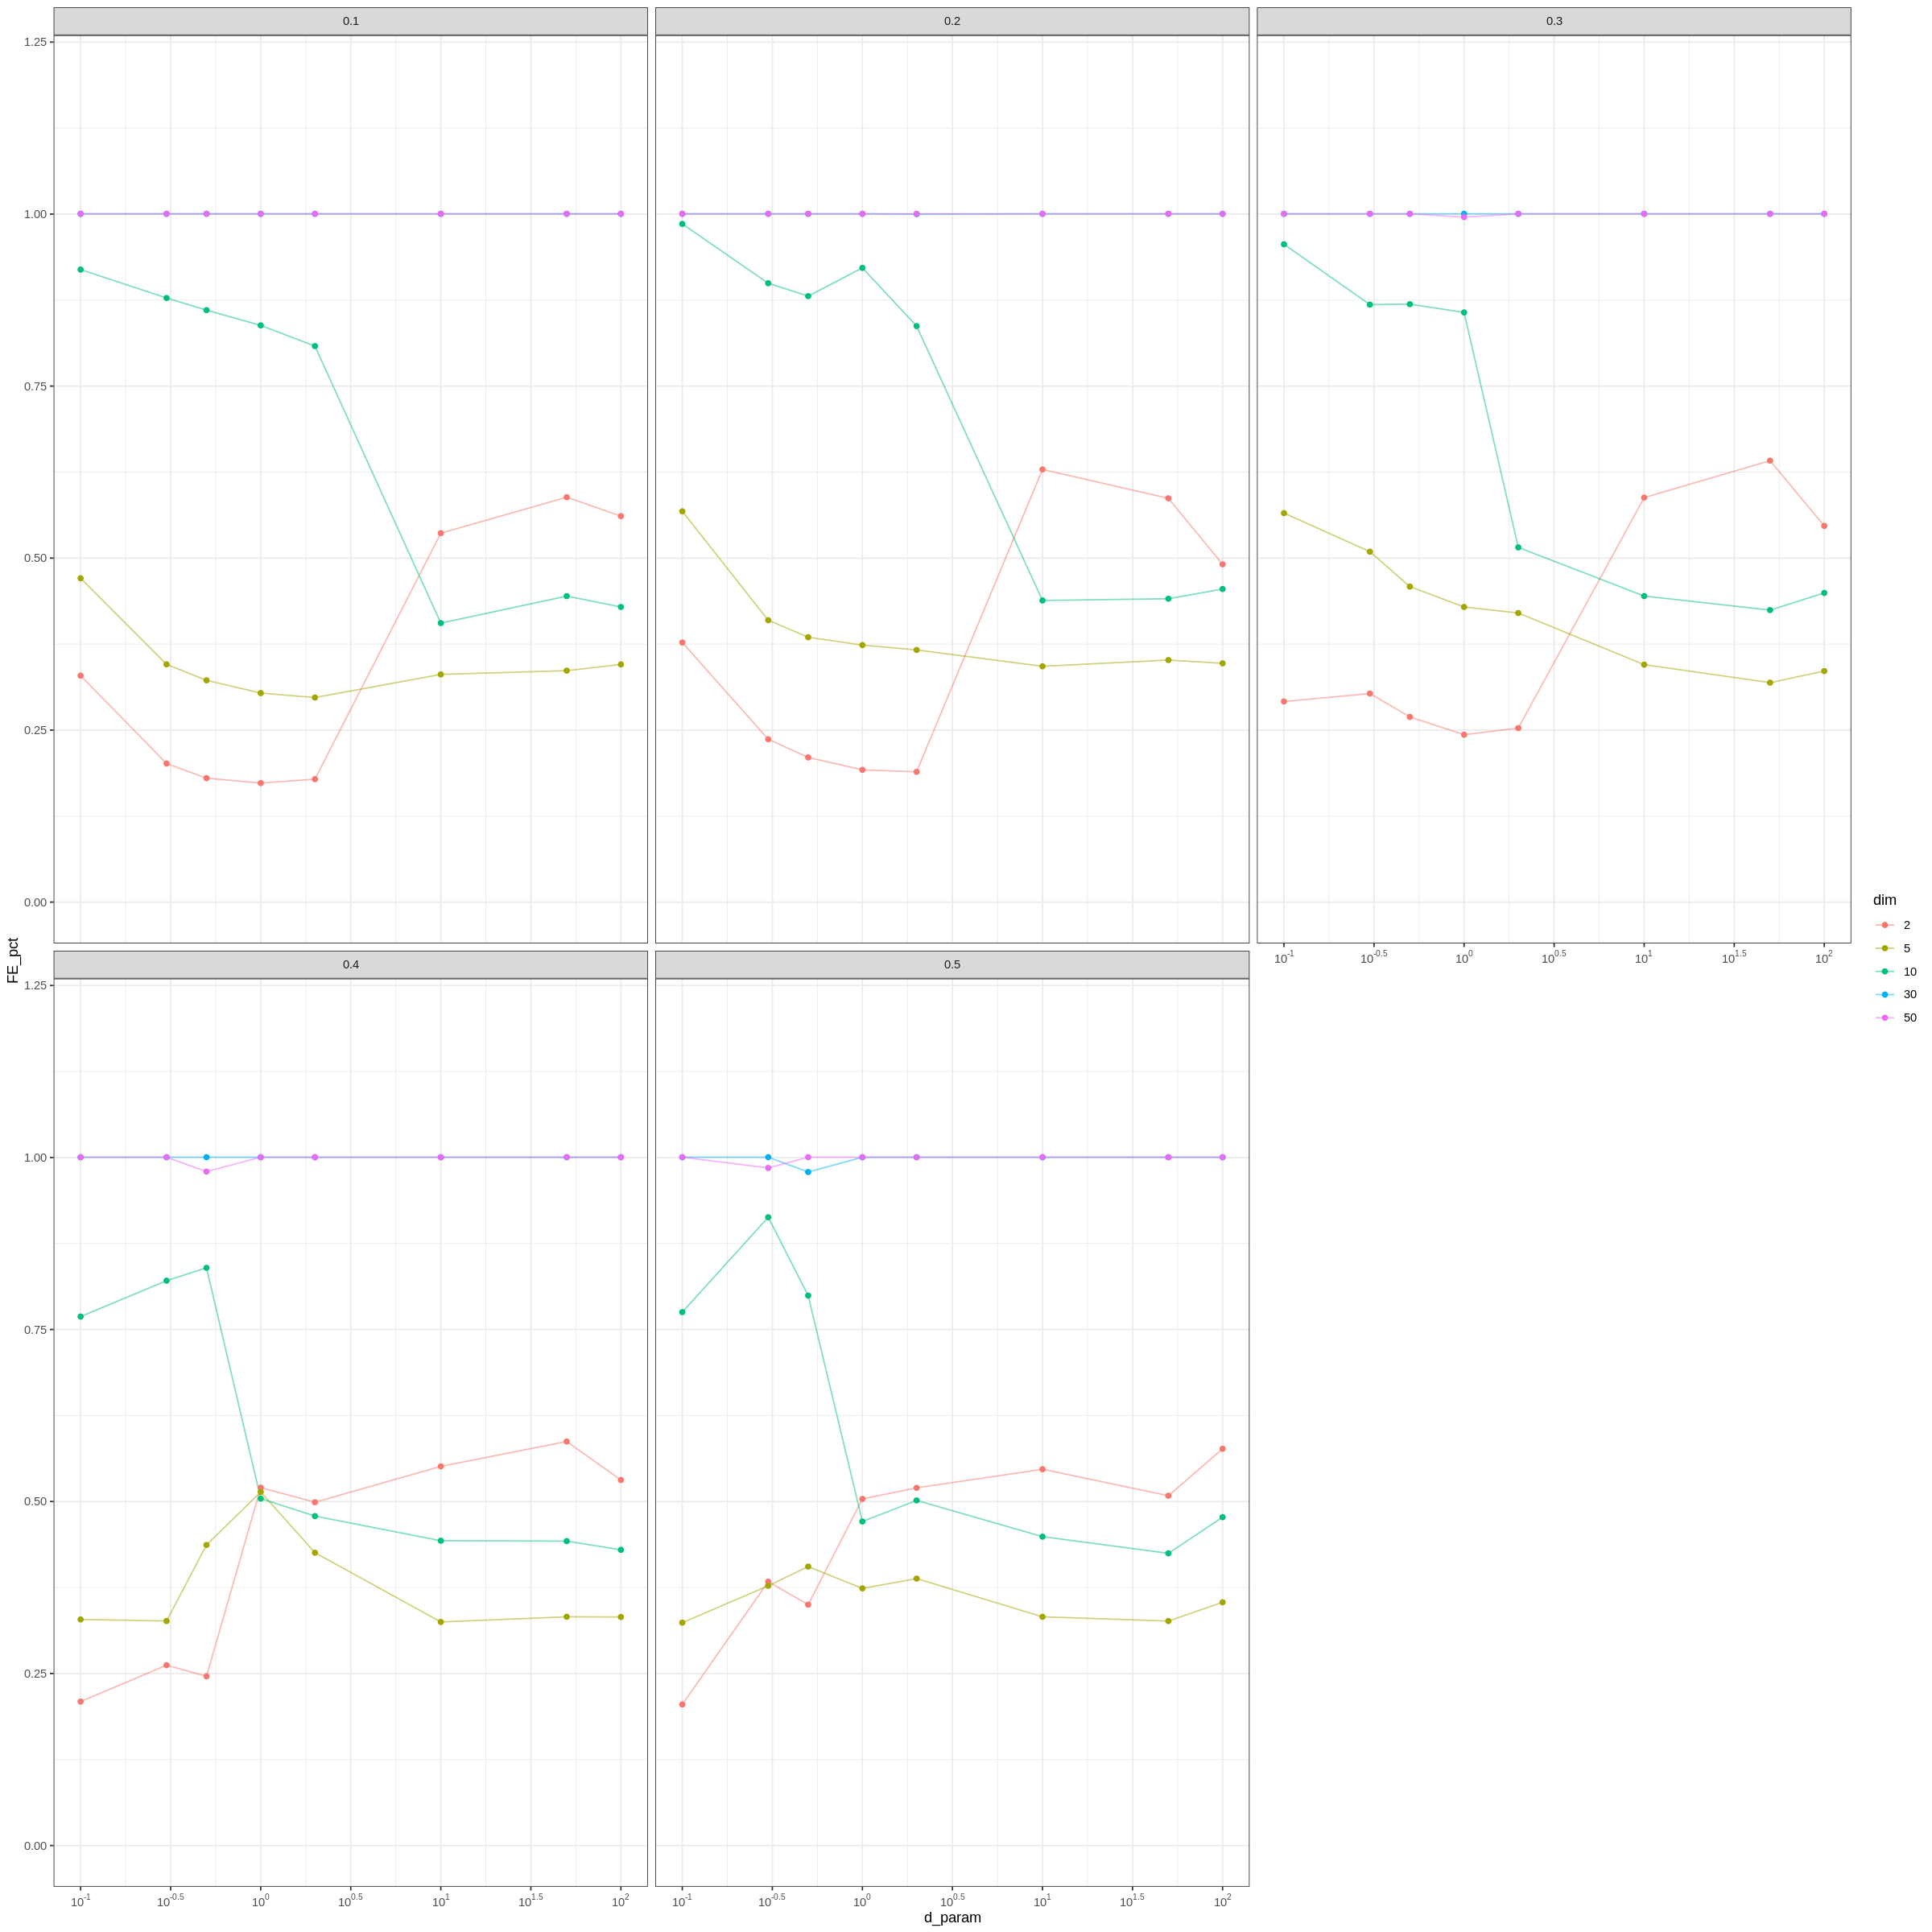

In [13]:
df_ave %>% dp_plot("Rastrigin")